## Make sure that you are in the right kernel (or virtual environment) before running the following code.



In [55]:
#Install the requiremnets 

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import os
import sys
from PIL import Image

# Upload the path of the folder 

In [56]:
# Write the path to the data file/ folder here:


# Add the directory of the folder you want to analyse. 
os.chdir(r'C:\Users\Rebe\Documents\Python programms\new_lab\matlab to python\Endometrial cancer Panel 2 cell density data')

datafd = os.getcwd() 


In [57]:
def custom_normalize(row):
    mean_value = row.mean()
    std_dev = row.std()
    normalized_row = (row - mean_value) / std_dev
    return normalized_row

def metric_type(new_metric ,data, index, column, normalize):
    for i in range(new_metric.shape[0]):  # 遍歷每一列
        if (normalize == True):
            normalized_row = custom_normalize(data[i, :].copy())  # 創建副本，避免修改原始數據
            col_min = normalized_row.min()
            col_max = normalized_row.max()
            print(col_min)
            print(col_max)
            new_metric[i, :] = (normalized_row - col_min) / (col_max - col_min) * 100
        else :
            col_min = data[i, :].min()
            col_max = data[i, :].max()
            print(col_min)
            print(col_max)
            new_metric[i, :] = (data[i, :] - col_min) / (col_max - col_min) * 100
    metric_df = pd.DataFrame(new_metric, index, column)
    print('===============================')
    print(f"metric")
    print(metric_df.head(5))
    print('===============================')
    return metric_df

In [58]:

datalist = [f for f in os.listdir(datafd) if f.endswith('.xlsx')]

'''Read Excel'''
density = []
cell_type = []
info = []
patients_number = []

for i in range(len(datalist) - 1):
    data = pd.read_excel(os.path.join(datafd, datalist[i]),engine='openpyxl')
    info.append(data.iloc[1:, :].values)



In [59]:
'''List to Numpy'''
info = np.concatenate(info, axis=0)
print('===============================')
print("Info")
print(info)
print(info.shape)
print('===============================')



Info
[['Cytotoxic T cell' 'DM01' 2197 24.48759059379794 89.7189125889928]
 ['PD-1+ cytotoxic T cell' 'DM01' 1153 24.48759059379794
  47.08507337965804]
 ['PD-1- cytotoxic T cell' 'DM01' 1044 24.48759059379794
  42.63383920933477]
 ...
 ['PD-L1+M2 Macrophage' 'DM32' 266 24.89960420567609 10.68290073218766]
 ['PD-L1+ Others cell' 'DM32' 869 24.89960420567609 34.38540403304782]
 ['PD-L1- Others cell' 'DM32' 223425 24.89960420567609 8840.689178462266]]
(300, 5)


In [60]:
''''---Unique value and index---'''
cname1, u1a, u2a = np.unique(info[:, 0], return_index=True, return_inverse=True) # cname1 會是所有免疫細胞的名稱 u1a會是他們分別對應到的索引
cname2, u1b, u2b = np.unique(info[:, 1], return_index=True, return_inverse=True) # cname2 會是所有病人的編號，u1b會是他們分別對應的索引
print('===============================')
print("cname1 & canme2")
print(cname1)
print(cname2)
print('===============================')
print('===============================')
print("u1a & u1b")
print(u1a)
print(u1b)
print('===============================')


cname1 & canme2
['Cytotoxic T cell' 'M1 Macrophage' 'M2 Macrophage' 'Macrophage'
 'PD-1+ cytotoxic T cell' 'PD-1- cytotoxic T cell' 'PD-L1+ Others cell'
 'PD-L1+M1 Macrophage' 'PD-L1+M2 Macrophage' 'PD-L1- Others cell']
['DM01' 'DM02' 'DM03' 'DM04' 'DM06' 'DM08' 'DM09' 'DM10' 'DM11' 'DM12'
 'DM13' 'DM14' 'DM15' 'DM16' 'DM17' 'DM18' 'DM19' 'DM20' 'DM21' 'DM22'
 'DM23' 'DM24' 'DM25' 'DM26' 'DM27' 'DM28' 'DM29' 'DM30' 'DM31' 'DM32']
u1a & u1b
[0 4 6 3 1 2 8 5 7 9]
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290]


In [61]:
metric = np.zeros((len(cname1), len(cname2)))
print('===============================')
print("metric")
print(metric)
print(metric.shape)
print('===============================')

metric
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
(10, 30)


In [62]:
'''---Map the value---'''
indtmp = np.ravel_multi_index((u2a, u2b), metric.shape)
print('===============================')
print("indtmp")
print(indtmp)
print(indtmp.shape)
print("===============================")


indtmp
[  0 120 150  90  30 210  60 240 180 270   1 121 151  91  31 211  61 241
 181 271   2 122 152  92  32 212  62 242 182 272   3 123 153  93  33 213
  63 243 183 273   4 124 154  94  34 214  64 244 184 274   5 125 155  95
  35 215  65 245 185 275   6 126 156  96  36 216  66 246 186 276   7 127
 157  97  37 217  67 247 187 277   8 128 158  98  38 218  68 248 188 278
   9 129 159  99  39 219  69 249 189 279  10 130 160 100  40 220  70 250
 190 280  11 131 161 101  41 221  71 251 191 281  12 132 162 102  42 222
  72 252 192 282  13 133 163 103  43 223  73 253 193 283  14 134 164 104
  44 224  74 254 194 284  15 135 165 105  45 225  75 255 195 285  16 136
 166 106  46 226  76 256 196 286  17 137 167 107  47 227  77 257 197 287
  18 138 168 108  48 228  78 258 198 288  19 139 169 109  49 229  79 259
 199 289  20 140 170 110  50 230  80 260 200 290  21 141 171 111  51 231
  81 261 201 291  22 142 172 112  52 232  82 262 202 292  23 143 173 113
  53 233  83 263 203 293  24 144 174 114  54

In [63]:

tmpk = info[:, 4]
print('===============================')
print("tmpk")
print(tmpk)
print(tmpk.shape)
print('===============================')
metric.flat[indtmp] = tmpk
metric_df = pd.DataFrame(metric,index=cname1, columns=cname2)
print('===============================')
print("metric")
print(metric_df)
print(f"metric_df.columns[7]: {metric_df.columns[7]}")
print(f"metric_df.shape[1]: {metric_df.shape[1]}")
print('===============================')

tmpk
[89.7189125889928 47.08507337965804 42.63383920933477 494.536200023989
 69.8721253708542 5.22713737432457 424.6640746531344 68.60617803800999
 71.18971950600752 8559.5789727092 66.94311598018298 12.71833268943143
 54.22478329075155 325.6924384658453 115.2384063278888 18.73376031281116
 210.4540321379565 50.8733307577257 324.326771181676 8747.99235470152
 24.68966792621026 13.01429350557287 11.67537442063739 716.1074833868922
 308.0049462985579 1.499589375127738 408.1025370883344 11.19336355006061
 50.28665789603498 7297.259228147163 526.6520570465738 287.7601526653008
 238.8919043812729 491.9345065570216 228.081122836425 32.52023716742862
 263.8533837205965 17.40272151121856 75.27330295995546 8080.734818326427
 25.82677238543035 12.95531277126295 12.8714596141674 411.9705608104522
 85.11095445198637 10.60742437258746 326.8596063584659 57.3555594533583
 475.2186249665452 6803.000275313161 152.824068543356 89.90105802525194
 62.92301051810411 757.6270590760914 167.3180052413223 3.40

In [64]:
'''---metric_origin---'''
metric_percentage = np.zeros(metric.shape)
metric_percentage_df = metric_type(metric_percentage, metric, cname1, cname2, 0)

'''---metric_normalize---'''
metric_normalize_percentage = np.zeros(metric.shape)
metric_normalize_percentage_df = metric_type(metric_normalize_percentage, metric, cname1, cname2, 1)

'''---metric_log_percentage---'''
metric_log = np.log(metric+1)
metric_log_percentage = np.zeros(metric.shape)
metric_log_percentage_df = metric_type(metric_log_percentage,metric_log, cname1, cname2, 0)

'''---metric_log_normalize_percentage---'''
metric_log_percentage_normalize = np.zeros(metric_log.shape)
metric_log_percentage_normalize_df = metric_type(metric_log_percentage_normalize, metric_log, cname1, cname2, 1)



4.206671090632156
1953.179383333624
3.953906666695556
585.6544296727495
103.2534483817068
1150.878689861215
107.2073550484024
1736.533119533965
0.1877462429607634
1687.05164893969
3.922161934743991
781.3458735061306
0.0
3150.997902806906
0.0
114.6550717899705
0.0
465.2823144134704
0.0
8922.181398952556
metric
                             DM01       DM02       DM03       DM04       DM06  \
Cytotoxic T cell         4.387555   3.218949   1.050964  26.806193   1.109308   
M1 Macrophage           11.331985  19.130892  52.269343  38.529657  13.951689   
M2 Macrophage           30.679924  10.232722  29.099059  15.329903  21.344098   
Macrophage              23.772339  13.409540  37.371294  23.612660  18.704866   
PD-1+ cytotoxic T cell   2.780149   0.742833   0.760378  17.047754   0.756882   

                             DM08        DM09       DM10       DM11      DM12  \
Cytotoxic T cell         7.625422   46.197859   5.142064   2.308531  1.737521   
M1 Macrophage           28.083884  100.0

In [65]:
def plot_clustermap(metric_df, save_dir):
    
    '''Plot Setting'''
    plt.style.use("classic")
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.size'] = 16
    cmap = ListedColormap(sns.color_palette("RdBu_r",10))
    clustermap = sns.clustermap(metric_df, row_cluster=True, col_cluster=True, 
                                method='average', cmap=cmap, figsize=(20, 12),
                                metric='euclidean',linewidths=0.5, linecolor='black')
    clustermap.ax_heatmap.set_xticklabels(clustermap.ax_heatmap.get_xticklabels(), rotation=90)
    clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_yticklabels(), rotation=0)
    plt.savefig(save_dir)

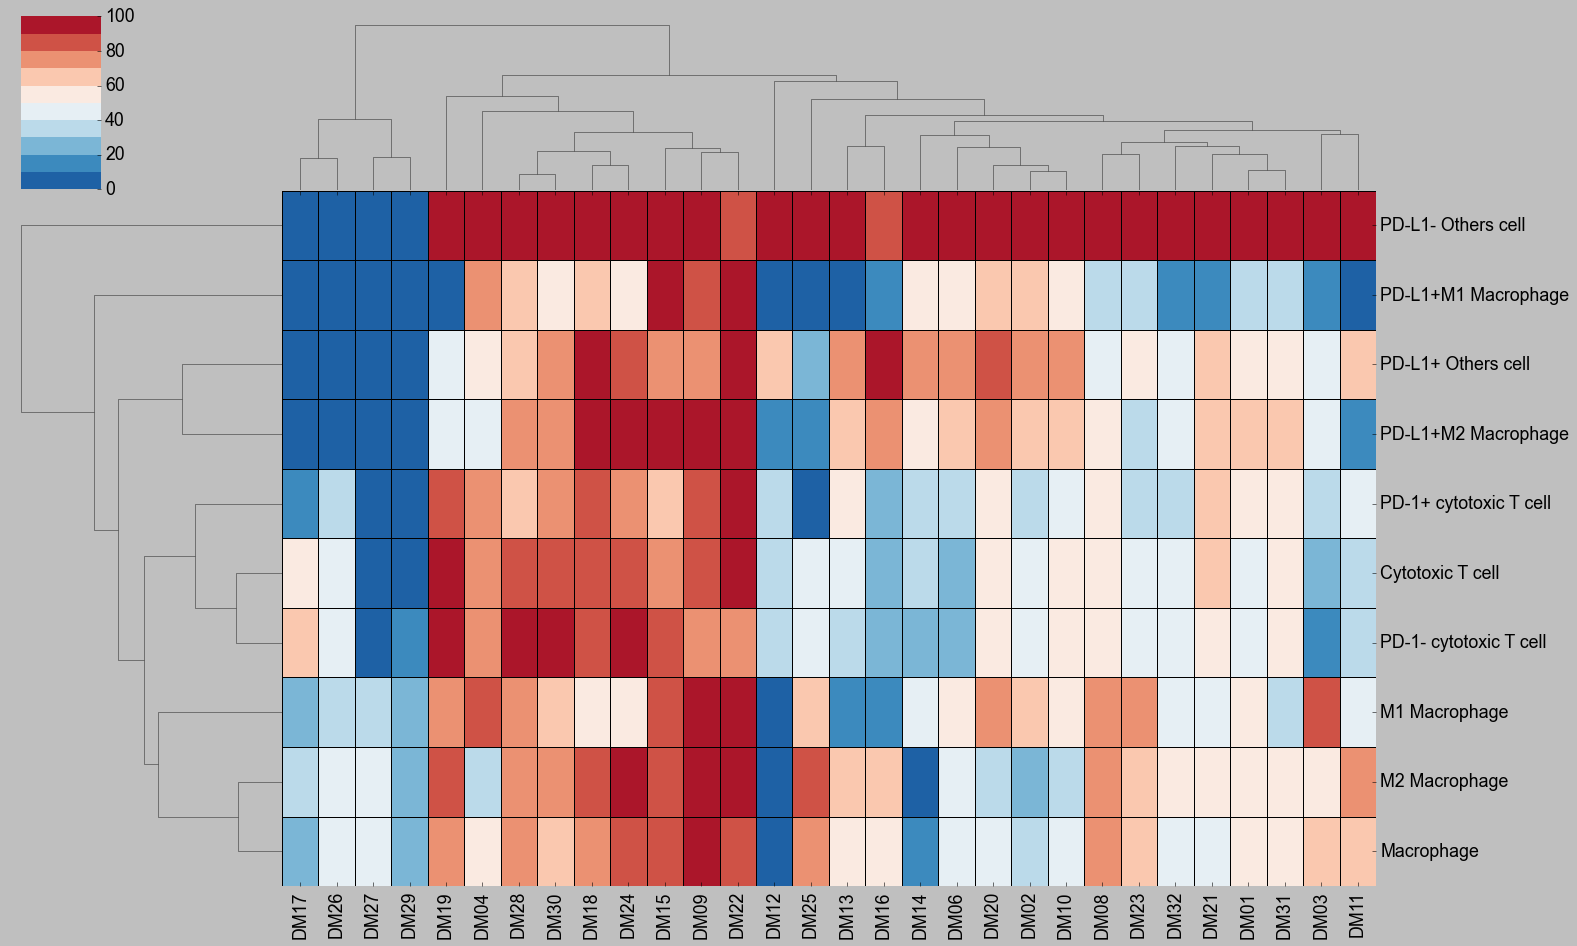

In [66]:
'''Choose graph type'''

metric = [metric_percentage_df ,metric_normalize_percentage_df,metric_log_percentage_df,metric_log_percentage_normalize_df]


# What type of information do you want in your plot? Choose 0, 1, or 2 depending on the answer
#  Original metrics, Normalized percentages, Logarithm of percentages or log percentage'
ch1 = int(3) # - metric_log_percentage_df] is the default 


#"What name do you want to give your plot? Do NOT write the file type (e.g., png, jpeg, etc)"
name = str('what_new')


## HERE !! Change the directory to the folder where you want to save the plot
os.chdir(r'C:\Users\Rebe\Documents\Python programms\clustermap_shy_simple_data')
##!!!!!

current_directory = os.getcwd()
save_dir_selection = os.path.join(current_directory, f'{name}.png')

# Assuming plot_clustermap is a function that creates and saves the plot
plot_clustermap(metric[ch1],save_dir_selection)

# Open and display the saved image
img = Image.open(save_dir_selection)
img.show()
